# Analysis of results with the simple configuration

## Setup
### Imports

In [81]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [82]:
results_path = 'results\\sudden_3_attribute_values\\10000\\100_iter_results.csv'

Create the results table

In [83]:
# load the results csv file
results_df_raw = pd.read_csv(results_path)
display(results_df_raw.head())

,config_window_generator_type,config_window_size,config_threshold,config_max_distance,config_slide_by,config_proportional_phi,config_proportional_rho,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,all_lags,config_event_log_file_path,compute_time,experiment_name
0,fixed,100,0.05,300,10,0.25,0.05,5,5,33,0.151515,1.0,0.263158,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.075737,initial
1,fixed,100,0.05,300,10,0.50,0.05,5,5,10,0.500000,1.0,0.666667,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.237157,initial
2,fixed,100,0.05,300,10,1.00,0.05,5,5,5,1.000000,1.0,1.000000,27.0,"[29, 19, 19, 9, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,3.047683,initial
3,fixed,100,0.05,300,20,0.25,0.05,5,5,29,0.172414,1.0,0.294118,31.0,"[39, 19, 19, 19, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,1.723898,initial
4,fixed,100,0.05,300,20,0.50,0.05,5,5,9,0.555556,1.0,0.714286,31.0,"[39, 19, 19, 19, 59]",data\synthetic\attribute_drift\sudden_3_attrib...,1.615488,initial


In [84]:
# drop some columns that are not needed
drop_columns = ['config_event_log_file_path', 'all_lags']
results_df = results_df_raw.drop(columns=drop_columns)

print(results_df.columns)

# rename existing columns
results_df.columns= ['window generator', '(initial) window size',
       'threshold', 'max distance',
       'slide by', 'proportional phi', 'proportional rho', 'number of correct detections',
       'number of true changes', 'number of detections', 'precision', 'recall',
       'f1 score', 'lag', 'compute time', 'experiment']

# define the configuration columns to group results on 
config_columns = ['window generator', '(initial) window size',
       'threshold', 'max distance', 'proportional phi',
       'proportional rho', 'slide by', 'experiment']

results_df = results_df.groupby(by=config_columns).agg({
    'number of correct detections': ['sum'],
    'number of true changes': ['sum'],
    'number of detections': ['sum'],
    'precision': ['mean'],
    'recall': ['mean'],
    'f1 score': ['mean'],
    'lag': ['mean'],
    'compute time': ['mean']
})

results_df = results_df.reset_index()

# recalculate precision, recall and f1
results_df[('precision', 'true')] = results_df['number of correct detections'] / results_df['number of detections']
results_df[('recall', 'true')] = results_df['number of correct detections'] / results_df['number of true changes']
results_df[('f1 score', 'true')] = 2 / (1/results_df[('precision', 'true')] + 1/results_df[('recall', 'true')])

results_df

Index(['config_window_generator_type', 'config_window_size',
       'config_threshold', 'config_max_distance', 'config_slide_by',
       'config_proportional_phi', 'config_proportional_rho',
       'number_of_correct_detections', 'number_of_true_changes',
       'number_of_detections', 'precision', 'recall', 'f1_score', 'mean_lag',
       'compute_time', 'experiment_name'],
      dtype='object')


,window generator,(initial) window size,threshold,max distance,proportional phi,proportional rho,slide by,experiment,number of correct detections,number of true changes,number of detections,precision,recall,f1 score,lag,compute time,precision,recall,f1 score
,,,,,,,,,sum,sum,sum,mean,mean,mean,mean,mean,true,true,true
0,adaptive,100,0.05,300,0.25,0.05,10,initial,497,500,3749,0.135341,0.994,0.237691,40.007000,3.301369,0.132569,0.994,0.233937
1,adaptive,100,0.05,300,0.25,0.05,20,initial,496,500,3355,0.152217,0.992,0.262925,38.437000,1.723320,0.147839,0.992,0.257328
2,adaptive,100,0.05,300,0.50,0.05,10,initial,497,500,1514,0.342284,0.994,0.505038,43.179000,3.289748,0.328269,0.994,0.493545
3,adaptive,100,0.05,300,0.50,0.05,20,initial,495,500,1400,0.373724,0.990,0.536377,40.525667,1.747339,0.353571,0.990,0.521053
4,adaptive,100,0.05,300,1.00,0.05,10,initial,482,500,492,0.981833,0.964,0.970470,44.654000,3.312903,0.979675,0.964,0.971774
5,adaptive,100,0.05,300,1.00,0.05,20,initial,478,500,522,0.926798,0.956,0.936137,40.415833,1.722739,0.915709,0.956,0.935421
6,adaptive,150,0.05,300,0.25,0.05,10,initial,500,500,2840,0.182001,1.000,0.306544,51.520000,3.998816,0.176056,1.000,0.299401
7,adaptive,150,0.05,300,0.25,0.05,20,initial,500,500,3663,0.140427,1.000,0.245508,41.050000,2.035526,0.136500,1.000,0.240211
8,adaptive,150,0.05,300,0.50,0.05,10,initial,500,500,951,0.549414,1.000,0.702032,57.530000,3.941489,0.525762,1.000,0.689180


In [85]:
# simplify by deleting non-interesting columns and getting rid of multiindex
drop_columns = [('precision', 'mean'), ('recall', 'mean'), ('f1 score', 'mean'), 
                ('number of correct detections', 'sum'), ('number of true changes', 'sum'), 
                ('number of detections', 'sum')]

all_results = results_df.drop(columns=drop_columns)
all_results.columns = all_results.columns.get_level_values(0)

# reorder columns
ordered_columns = config_columns + ['precision', 'recall', 'f1 score', 'lag', 'compute time']

all_results = all_results[ordered_columns]

# create the simple results dataframe
simple_results_df = all_results.query("`experiment` == 'initial'")#population comparer` == "KS test")[simple_results_df['slide by'] == 5 or simple_results_df['slide by'] == 10]

# drop the threshold, experiment and max distance (they are always the same)
simple_results_df = simple_results_df.drop(columns=['experiment', 'threshold', 'max distance', 'proportional rho'])

# set the configuration columns as index
all_results = all_results.set_index(config_columns)
simple_results_df = simple_results_df.set_index(['window generator', '(initial) window size', 'proportional phi', 'slide by'])

## Analysis

### Get an overview of the simple results table
Show the table, write to Latex.

Also, produce a facet grid plot.

In [86]:
simple_results_df

precision  \
window generator (initial) window size proportional phi slide by              
adaptive         100                   0.25             10         0.132569   
                                                        20         0.147839   
                                       0.50             10         0.328269   
                                                        20         0.353571   
                                       1.00             10         0.979675   
                                                        20         0.915709   
                 150                   0.25             10         0.176056   
                                                        20         0.136500   
                                       0.50             10         0.525762   
                                                        20         0.409836   
                                       1.00             10         0.991984   
                                                        20         0.987976   
                 200                   0.25             10         0.222321   
                                                        20         0.229779   
                                       0.50             10         0.576701   
                                                        20         0.494071   
                                       1.00             10         0.991597   
                                                        20         0.986301   
fixed            100                   0.25             10         0.131593   
                                                        20         0.146675   
                                       0.50             10         0.325182   
                                                        20         0.350927   
                                       1.00             10         0.979550   
                                                        20         0.918251   
                 150                   0.25             10         0.175088   
                                                        20         0.136004   
                                       0.50             10         0.523061   
                                                        20         0.407015   
                                       1.00             10         0.991952   
                                                        20         0.987976   
                 200                   0.25             10         0.221828   
                                                        20         0.229991   
                                       0.50             10         0.575374   
                                                        20         0.493097   
                                       1.00             10         0.994012   
                                                        20         0.988095   

                                                                  recall  \
window generator (initial) window size proportional phi slide by           
adaptive         100                   0.25             10         0.994   
                                                        20         0.992   
                                       0.50             10         0.994   
                                                        20         0.990   
                                       1.00             10         0.964   
                                                        20         0.956   
                 150                   0.25             10         1.000   
                                                        20         1.000   
                                       0.50             10         1.000   
                                                        20         1.000   
                                       1.00             10         0.990   
                                                        20         0.986   

In [87]:
# write simple results to latex for results table
path = 'results/latex/simple_results_table.tex'
with open(path, 'w') as file:
    simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')

C:\Users\Lennart\AppData\Local\Temp\ipykernel_12228\1510524082.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Simple Configuration', label='tab:results_simple')


In [88]:
# get a generatl statistic across all configurations
general_stats = simple_results_df.describe()

general_stats = general_stats.loc[['mean', 'std', 'min', 'max']]

display(general_stats)

# write general stats to latex
path = 'results/latex/simple_general_stats.tex'
with open(path, 'w') as file:
    general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')

# also write to csv for comparison with complex configuration
path = 'results/csv/simple_general_stats.csv'
with open(path, 'w') as file:
    general_stats.to_csv(file)

,precision,recall,f1 score,lag,compute time
mean,0.532283,0.979500,0.621550,40.406968,2.901243
std,0.343074,0.052523,0.283331,10.342889,1.019726
min,0.131593,0.708000,0.232252,25.645000,1.577657
max,0.994012,1.000000,0.995005,66.026000,4.638239


C:\Users\Lennart\AppData\Local\Temp\ipykernel_12228\2700325523.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Simple Configuration', label='tab:results_simple_agg')


In [89]:
# Get the result with the highest f1 score
df = simple_results_df.reset_index()
df.sort_values('f1 score', ascending=False)[:3]

,window generator,(initial) window size,proportional phi,slide by,precision,recall,f1 score,lag,compute time
34,fixed,200,1.0,10,0.994012,0.996,0.995005,35.9550,4.301294
35,fixed,200,1.0,20,0.988095,0.996,0.992032,39.7500,2.270468
10,adaptive,150,1.0,10,0.991984,0.990,0.990991,58.0025,3.931762


In [90]:
df = simple_results_df.reset_index()
df_corr = df.corr()[['precision', 'recall', 'f1 score', 'lag', 'compute time']]
df_corr = df_corr.loc[['(initial) window size', 'proportional phi', 'slide by']]
display(df_corr)

# export table to latex
path = 'results/latex/simple_correlations.tex'
with open(path, 'w') as file:
    df_corr.to_latex(file, float_format="%.2f", caption='Correlations of Settings', label='tab:correlations_settings')

,precision,recall,f1 score,lag,compute time
(initial) window size,0.130074,-0.127441,0.143162,0.319504,0.393584
proportional phi,0.984460,-0.430050,0.958432,0.130642,-0.005164
slide by,-0.042943,0.078309,-0.032600,-0.087207,-0.904352


C:\Users\Lennart\AppData\Local\Temp\ipykernel_12228\743803148.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_corr.to_latex(file, float_format="%.2f", caption='Correlations of Settings', label='tab:correlations_settings')


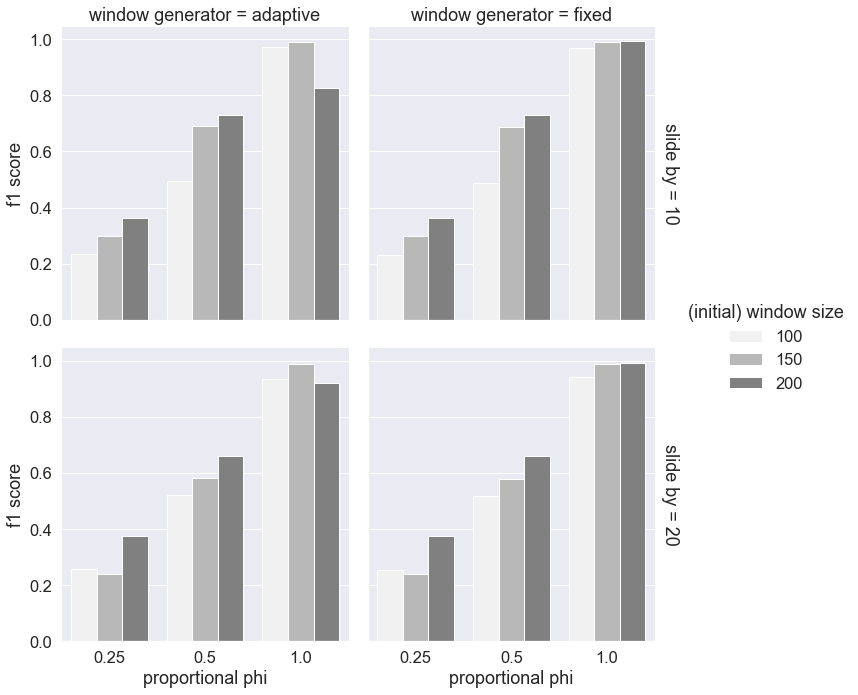

In [91]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="f1 score",
                hue="(initial) window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [92]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['f1 score']

window generator
adaptive    0.615491
fixed       0.627609
Name: f1 score, dtype: float64

In [93]:
df.groupby(['slide by']).mean()['f1 score']

slide by
10    0.630657
20    0.612443
Name: f1 score, dtype: float64

In [94]:
df.groupby(['(initial) window size']).mean()['f1 score']

(initial) window size
100    0.568091
150    0.630501
200    0.666058
Name: f1 score, dtype: float64

In [95]:
df.groupby(['proportional phi']).mean()['f1 score']

proportional phi
0.25    0.294200
0.50    0.611651
1.00    0.958799
Name: f1 score, dtype: float64

- Window generator is not strongly correlated (slightly better score for the adaptive window generator)
- KS test is far superior than the chi square test (more robust, better precision, see overview table)
- larger slide by is preferred
- smaller (initial) window size is preferred


The positive influence of "slide by" on f1 score is hard to understand. Therefore, additional runs with different slide by settings where performed.

Although the number of computations decreases linarly with "slide by", the compute time decreases exponentially.

precision  \
window generator (initial) window size threshold max distance proportional phi proportional rho slide by experiment                     
fixed            200                   0.05      300          0.25             0.1              10       proportional_phis   0.213950   
                                                              0.50             0.1              10       proportional_phis   0.553710   
                                                              0.75             0.1              10       proportional_phis   0.902527   
                                                              1.00             0.1              10       proportional_phis   0.992032   
                                                              1.25             0.1              10       proportional_phis   0.997674   
                                                              1.50             0.1              10       proportional_phis   1.000000   
                                                              1.75             0.1              10       proportional_phis   1.000000   
                                                              2.00             0.1              10       proportional_phis   1.000000   

                                                                                                                            recall  \
window generator (initial) window size threshold max distance proportional phi proportional rho slide by experiment                  
fixed            200                   0.05      300          0.25             0.1              10       proportional_phis   1.000   
                                                              0.50             0.1              10       proportional_phis   1.000   
                                                              0.75             0.1              10       proportional_phis   1.000   
                                                              1.00             0.1              10       proportional_phis   0.996   
                                                              1.25             0.1              10       proportional_phis   0.858   
                                                              1.50             0.1              10       proportional_phis   0.144   
                                                              1.75             0.1              10       proportional_phis   0.012   
                                                              2.00             0.1              10       proportional_phis   0.002   

                                                                                                                            f1 score  \
window generator (initial) window size threshold max distance proportional phi proportional rho slide by experiment                    
fixed            200                   0.05      300          0.25             0.1              10       proportional_phis  0.352485   
                                                              0.50             0.1              10       proportional_phis  0.712758   
                                                              0.75             0.1              10       proportional_phis  0.948767   
                                                              1.00             0.1              10       proportional_phis  0.994012   
                                                              1.25             0.1              10       proportional_phis  0.922581   
                                                              1.50             0.1              10       proportional_phis  0.251748   
                                                              1.75             0.1              10       proportional_phis  0.023715   
                                                              2.00             0.1              10       proportional_phis  0.003992   

                                                   

,proportional phi,precision,recall,f1 score,lag,compute time
proportional phi,,,,,,
0.25,0.25,0.213950,1.000,0.352485,26.320000,4.799203
0.50,0.50,0.553710,1.000,0.712758,32.620000,4.746890
0.75,0.75,0.902527,1.000,0.948767,35.640000,4.779031
1.00,1.00,0.992032,0.996,0.994012,35.455000,4.805168
1.25,1.25,0.997674,0.858,0.922581,29.480000,4.765838
1.50,1.50,1.000000,0.144,0.251748,4.258621,4.713437
1.75,1.75,1.000000,0.012,0.023715,-22.666667,4.684063
2.00,2.00,1.000000,0.002,0.003992,19.000000,4.685316


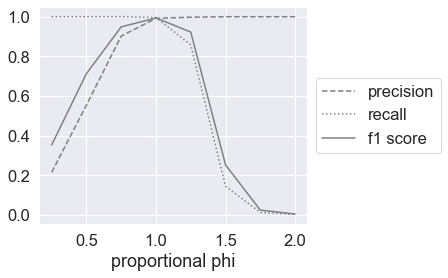

In [110]:
prop_phi_df = all_results.query("`experiment` == 'proportional_phis'")

# get the slide_by configuration into the index
prop_phi_df = prop_phi_df.reset_index()
prop_phi_df.index = prop_phi_df['proportional phi']

# drop the experiment column
prop_phi_df = prop_phi_df.drop(columns=['experiment'])

# only get precision, recall, f1, mean_lag and compute time
prop_phi_df = prop_phi_df[['proportional phi', 'precision', 'recall', 'f1 score', 'lag', 'compute time']]

# show precision, recall and f1 in a plot
precision_values = prop_phi_df['precision']
recall_values = prop_phi_df['recall']
f1_values = prop_phi_df['f1 score']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(precision_values.index, precision_values, label='precision', ls='dashed', color='grey')
ax.plot(recall_values.index, recall_values, label='recall', ls='dotted', color='grey')
ax.plot(f1_values.index, f1_values, label='f1 score', ls='solid', color='grey')
plt.xlabel("proportional phi")

# # add the maximum f1-score with a label
# loc_max_f1 = prop_phi_df['f1 score'].idxmax()
# max_f1 = prop_phi_df['f1 score'][loc_max_f1]

# # add the label to the graph
# ax.scatter(x=[loc_max_f1], 
#             y=[max_f1], 
#             marker='x', 
#             color='black')
# ax.annotate(f'Max: ({loc_max_f1}, {max_f1:.2})', xy=(loc_max_f1, max_f1+0.05))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.show()

### Lag

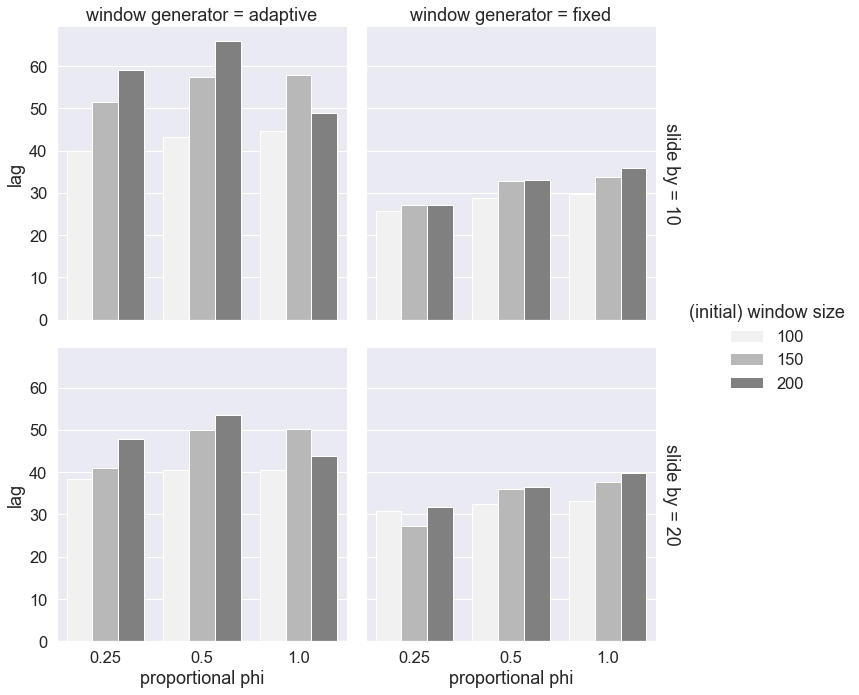

In [97]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="lag",
                hue="(initial) window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [98]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['lag']

window generator
adaptive    48.598380
fixed       32.215556
Name: lag, dtype: float64

In [99]:
df.groupby(['slide by']).mean()['lag']

slide by
10    41.296324
20    39.517611
Name: lag, dtype: float64

### Compute Time


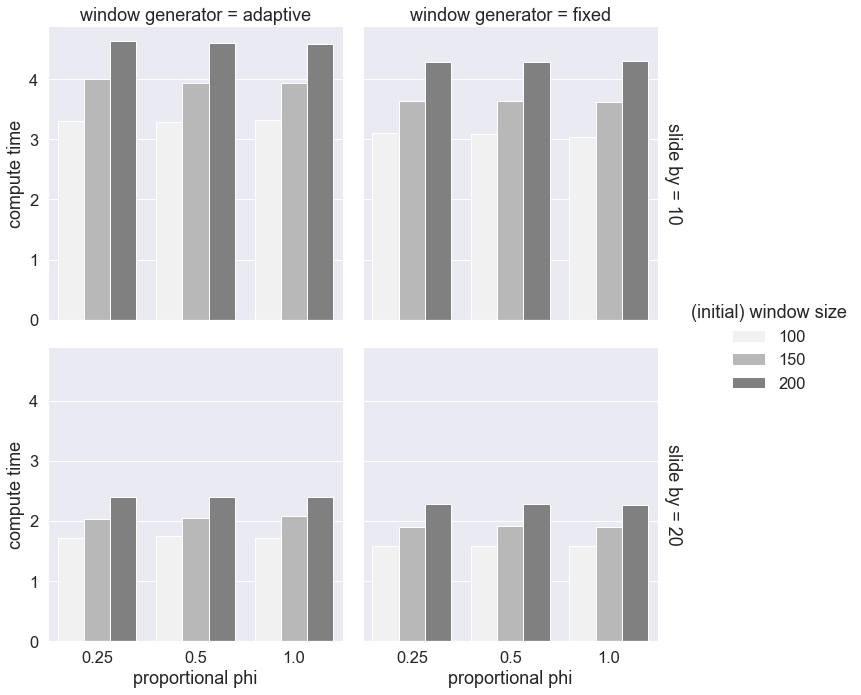

In [100]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="proportional phi", y="compute time",
                hue="(initial) window size", col="window generator",
                row="slide by",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [101]:
f"Compute times where between {min(df['compute time']):.2f} and {max(df['compute time']):.2f} seconds. With an average of {df['compute time'].mean():.2f}."

'Compute times where between 1.58 and 4.64 seconds. With an average of 2.90.'

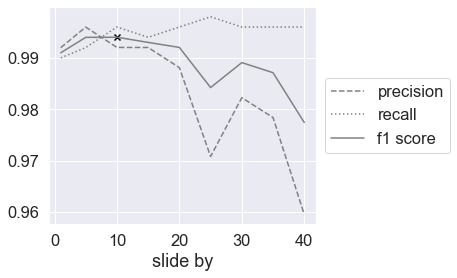

In [102]:
slide_by_df = all_results.query("`experiment` == 'slide_bys'")

# get the slide_by configuration into the index
slide_by_df = slide_by_df.reset_index()
slide_by_df.index = slide_by_df['slide by']

# drop the experiment column
slide_by_df = slide_by_df.drop(columns=['experiment'])

# only get precision, recall, f1, mean_lag and compute time
slide_by_df = slide_by_df[['slide by', 'precision', 'recall', 'f1 score', 'lag', 'compute time']]
slide_by_df

# show precision, recall and f1 in a plot
precision_values = slide_by_df['precision']
recall_values = slide_by_df['recall']
f1_values = slide_by_df['f1 score']

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(precision_values.index, precision_values, label='precision', ls='dashed', color='grey')
ax.plot(recall_values.index, recall_values, label='recall', ls='dotted', color='grey')
ax.plot(f1_values.index, f1_values, label='f1 score', ls='solid', color='grey')
plt.xlabel("slide by")

# add the maximum f1-score with a label
loc_max_f1 = slide_by_df['f1 score'].idxmax()
max_f1 = slide_by_df['f1 score'][loc_max_f1]

# add the label to the graph
ax.scatter(x=[loc_max_f1], 
            y=[max_f1], 
            marker='x', 
            color='black')
ax.annotate(f'Max: ({loc_max_f1}, {max_f1:.2})', xy=(loc_max_f1, max_f1+0.01))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.show()

We can clearly see how different settings of "slide by" impact precision and recall. For low "slide by" settings, there are many false positives. Hence, the precision is very low. The more it slides, the higher the precision, while recall decreases (more false negatives).

In conclusion, higher "slide by" settings make the approach more robust but also less sensitive. A value of 15 to 25 appears to strike a balance between the two.

Next, we quickly confirm whether the runtime really decreases linearly with increasing "slide by".

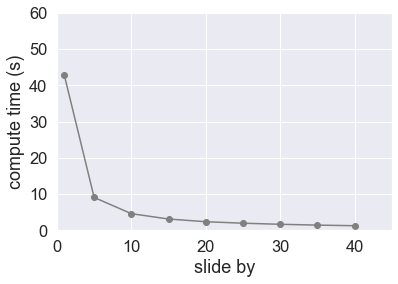

In [103]:
slide_by_df['compute time'].plot(color='grey', marker='o')
plt.ylabel('compute time (s)')
plt.ylim(0, 60)
plt.xlim(0, 45)
plt.show()


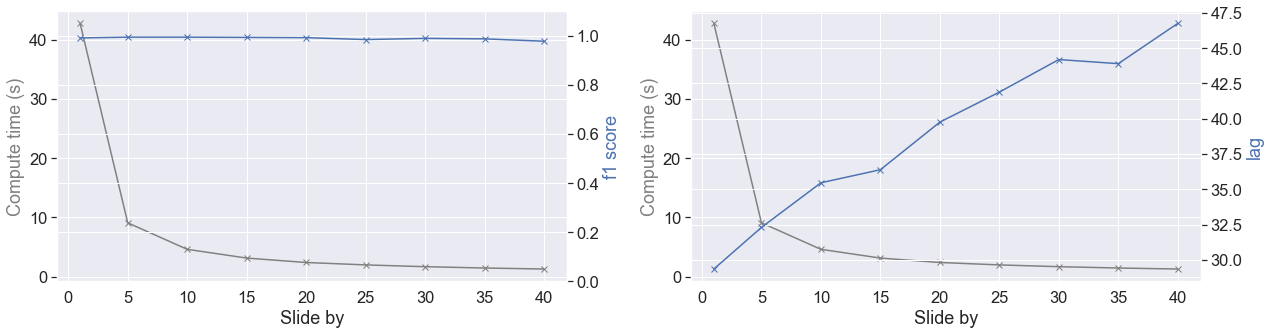

In [104]:
import numpy as np
import matplotlib.pyplot as plt
x = list(slide_by_df.index)
y1 = list(slide_by_df['compute time'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

for i, secondary_measure in enumerate(['f1 score', 'lag']):
    y2 = list(slide_by_df[secondary_measure])

    ax1 = ax[i]
    ax2 = ax1.twinx()
    ax1.plot(x, y1, 'gray', marker='x')
    ax2.plot(x, y2, 'b-', marker='x')
    if secondary_measure == 'f1 score':
        ax2.set_ylim(0, 1.1)

    ax1.set_xlabel('Slide by')
    ax1.set_ylabel('Compute time (s)', color='gray')
    ax2.set_ylabel(secondary_measure, color='b')

plt.tight_layout()
plt.show()

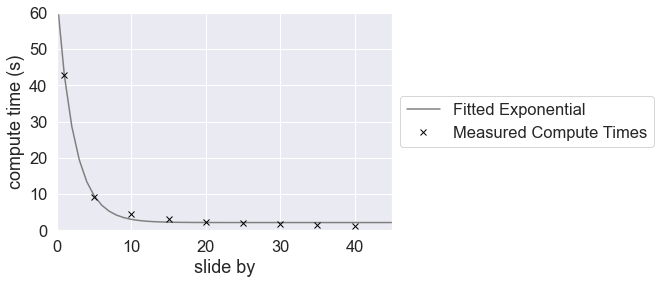

In [105]:
# attempt to fit an exponential function to the compute time - "slide by" graph
x = slide_by_df['compute time'].index
y = slide_by_df['compute time']

def exp_function(x, a, k, b):
    return a * np.exp(-k*x) + b

p0 = (1.,0.1,1.)
opt, pcov = curve_fit(exp_function, x, y, p0)

# get optimization result into variables
a, k, b = opt

x2 = np.arange(0, 50, step=1)
y2 = exp_function(x2, a, k, b)

fig, ax = plt.subplots()

ax.plot(x2, y2, color='grey', label='Fitted Exponential')
ax.plot(x, y, 'x', color='black', label='Measured Compute Times')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.ylabel('compute time (s)')
plt.xlabel('slide by')
plt.ylim(0, 60)
plt.xlim(0, 45)
plt.show()

- Again no differences between adaptive and fixed window generator
- Chi Squared test much more computationally heavy than KS test
- Decreased (initial) window size decreases compute times greatly (for the KS test the compute time is directly proportinal to the computation time)
- Compute time is directly proportional to the slide by, the larger the slide, the less computations.